# Mesh_size analysis

# Average temperature
2024-09-05 yanjun zhang

Lables already exists, for mesh m-3-20.msh is  [1713, 1587, 708]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-20-c-1-e-8476/Result_T-s-608-d-224-m-3-20-c-1-e-8476.csv
Lables already exists, for mesh m-3-10.msh is  [3157, 7018, 2141]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-10-c-1-e-43604/Result_T-s-608-d-224-m-3-10-c-1-e-43604.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-5-c-1-e-271817/Result_T-s-608-d-224-m-3-5-c-1-e-271817.csv


FileNotFoundError: [Errno 2] No such file or directory: 'm-3-2.msh'

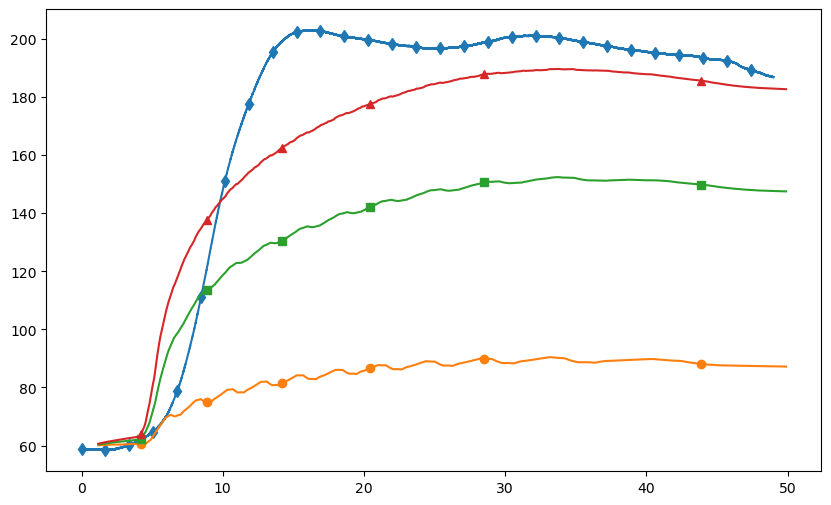

In [1]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('/home/yanjun/documents/fenicsx/project/therm_disc/implicit/tetrahedron/')

from disc_f import *

source_dir = '/home/yanjun/documents/sim_results/implicit_dx/'

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)
#for file in csv_files:
    #shutil.copy(file, destination_dir)
type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
t_e = np.linspace (0, 49, len(T_e_ave) )
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<','d' ] 

for csv_file in csv_files:
    lables = find_3_coord(  extract_mesh_labels(csv_file)  )
    t,T = read_t_T ( csv_file )
    #calculate average temperature
    T_3_ave = []
    for i in range(len(T)):
        T_3_all =  T[i][ lables[0] ] + T[i][ lables[1] ] + T[i][ lables[2] ]   
        T_3_ave.append ( T_3_all / 3 )
    plt.plot(t,pd.Series(T_3_ave).rolling(window=30).mean(),label= f'elements { extract_file_labels(csv_file, type1)  }',
             marker=marker_styles[j], markevery=100)
    j += 1




plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Average temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_dx_P_3.png')
plt.show()


## Absolute error

Lables already exists, for mesh m-3-20.msh is  [1713, 1587, 708]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-20-c-1-e-8476/Result_T-s-608-d-224-m-3-20-c-1-e-8476.csv
Lables already exists, for mesh m-3-10.msh is  [3157, 7018, 2141]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-10-c-1-e-43604/Result_T-s-608-d-224-m-3-10-c-1-e-43604.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-5-c-1-e-271817/Result_T-s-608-d-224-m-3-5-c-1-e-271817.csv


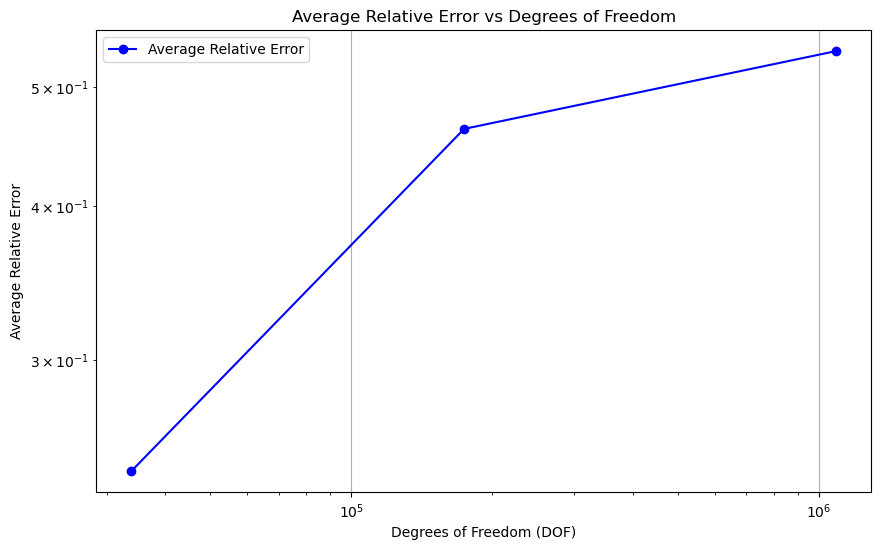

In [2]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

# Adding path for your custom functions (if needed)
sys.path.append('/home/yanjun/documents/fenicsx/project/therm_disc/implicit/tetrahedron/')

from disc_f import *  # Assuming this file has functions like collect_csv_files, extract_file_labels, etc.

# Directory containing your simulation results
source_dir = '/home/yanjun/documents/sim_results/implicit_dx/'

# Collect all CSV files from the directory
csv_files = collect_csv_files(source_dir)

# Sort CSV files by mesh size or other labels (e.g., 'mesh_size')
type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x, type1))

# Read experimental data
df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_ave = (df1.iloc[:, 1] + df1.iloc[:, 3] + df1.iloc[:, 5]) / 3  # Average of experimental temperatures

# Initialize lists to store DOF and average relative errors for each case
dof_list = []
avg_relative_errors = []

# Loop over all CSV files (cases)
for csv_file in csv_files:
    # Extract mesh information and calculate DOF (elements * 4)
    labels = find_3_coord(extract_mesh_labels(csv_file))
    num_elements = extract_file_labels(csv_file, type1)
    dof = int(num_elements) * 4  # DOF calculation

    # Read simulated time and temperature data
    t, T = read_t_T(csv_file)

    # Calculate average temperature at the three labels
    T_3_ave = []
    for i in range(len(T)):
        T_3_all = T[i][labels[0]] + T[i][labels[1]] + T[i][labels[2]]
        T_3_ave.append(T_3_all / 3)

    # Smooth the data using rolling mean (if desired)
    T_3_ave = pd.Series(T_3_ave).rolling(window=1).mean()

    # Compute relative error between experimental (T_e_ave) and simulation (T_3_ave)
    #relative_error = np.abs((T_e_ave - T_3_ave) / T_e_ave)
    relative_error = np.abs((T_e_ave - T_3_ave) / T_3_ave)
    # Store DOF and the average relative error for this case
    dof_list.append(dof)
    avg_relative_errors.append(np.mean(relative_error))

# Plot DOF vs Average Relative Error
plt.figure(figsize=(10, 6))
plt.loglog(dof_list, avg_relative_errors, marker='o', linestyle='-', color='b', label="Average Relative Error")

# Label the axes
plt.xlabel('Degrees of Freedom (DOF)')
plt.ylabel('Average Relative Error')
plt.title('Average Relative Error vs Degrees of Freedom')

# Add grid and legend
plt.grid(True)
plt.legend()

# Save and display the plot
plt.savefig('avg_relative_error_vs_dof.png')
plt.show()


In [11]:
for csv_file in csv_files:
    print(csv_file)
print(dof_list)
print(avg_relative_errors)

/home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-20-c-1-e-8476/Result_T-s-608-d-224-m-3-20-c-1-e-8476.csv
/home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-10-c-1-e-43604/Result_T-s-608-d-224-m-3-10-c-1-e-43604.csv
/home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-5-c-1-e-271817/Result_T-s-608-d-224-m-3-5-c-1-e-271817.csv
/home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-3-c-1-e-1184080/Result_T-s-608-d-224-m-3-3-c-1-e-1184080.csv
[33904, 174416, 1087268, 4736320]
[0.40117996921922394, 1.226253169630716, 1.7470120621388923, 1.95439728508076]


## RMSE

Lables already exists, for mesh m-3-20.msh is  [1713, 1587, 708]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-20-c-1-e-8476/Result_T-s-608-d-224-m-3-20-c-1-e-8476.csv
Lables already exists, for mesh m-3-10.msh is  [3157, 7018, 2141]
t and T have been successfully extracted from /home/yanjun/documents/sim_results/implicit_dx/s-608-d-224-m-3-10-c-1-e-43604/Result_T-s-608-d-224-m-3-10-c-1-e-43604.csv


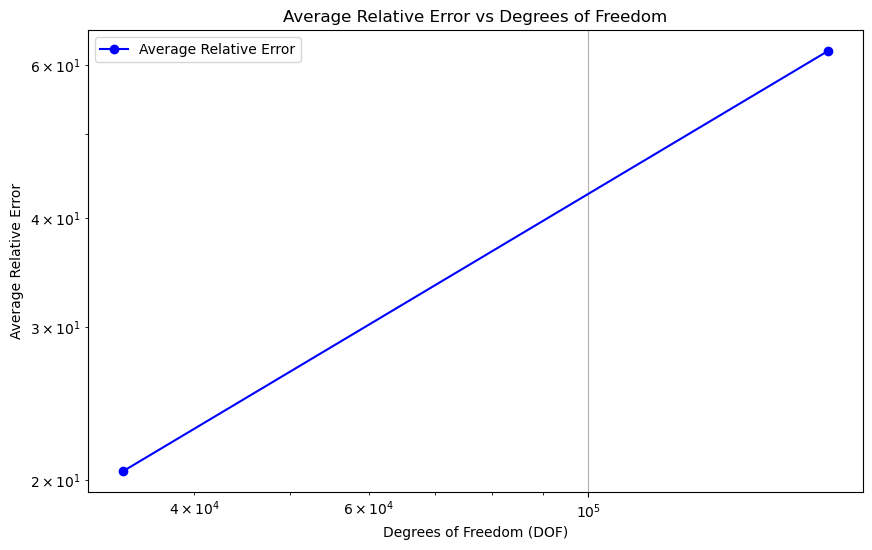

In [12]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

# Adding path for your custom functions (if needed)
sys.path.append('/home/yanjun/documents/fenicsx/project/therm_disc/implicit/tetrahedron/')

from disc_f import *  # Assuming this file has functions like collect_csv_files, extract_file_labels, etc.

# Directory containing your simulation results
source_dir = '/home/yanjun/documents/sim_results/implicit_dx/'

# Collect all CSV files from the directory
csv_files = collect_csv_files(source_dir)

# Sort CSV files by mesh size or other labels (e.g., 'mesh_size')
type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x, type1))

# Read experimental data
df1 = pd.read_csv('/home/yanjun/documents/sim_results/experiment_result.csv')
T_e_ave = (df1.iloc[:, 1] + df1.iloc[:, 3] + df1.iloc[:, 5]) / 3  # Average of experimental temperatures

# Initialize lists to store DOF and average relative errors for each case
dof_list = []
avg_rmse_errors = []

# Loop over all CSV files (cases)
for csv_file in csv_files[0:2]:
    # Extract mesh information and calculate DOF (elements * 4)
    labels = find_3_coord(extract_mesh_labels(csv_file))
    num_elements = extract_file_labels(csv_file, type1)
    dof = int(num_elements) * 4  # DOF calculation

    # Read simulated time and temperature data
    t, T = read_t_T(csv_file)

    # Calculate average temperature at the three labels
    T_3_ave = []
    for i in range(len(T)):
        T_3_all = T[i][labels[0]] + T[i][labels[1]] + T[i][labels[2]]
        T_3_ave.append(T_3_all / 3)

    # Smooth the data using rolling mean (if desired)
    T_3_ave = pd.Series(T_3_ave).rolling(window=1).mean()
    sum = 0;
    for i in range(len(T_3_ave)):
        sum = sum + np.abs(T_3_ave[i]-T_e_ave[i])
    rmse_error = sum/ len(T);


    # Store DOF and the average relative error for this case
    dof_list.append(dof)
    avg_rmse_errors.append(rmse_error)

# Plot DOF vs Average Relative Error
plt.figure(figsize=(10, 6))
plt.loglog(dof_list, avg_rmse_errors, marker='o', linestyle='-', color='b', label="Average Relative Error")

# Label the axes
plt.xlabel('Degrees of Freedom (DOF)')
plt.ylabel('Average Relative Error')
plt.title('Average Relative Error vs Degrees of Freedom')

# Add grid and legend
plt.grid(True)
plt.legend()

# Save and display the plot
plt.savefig('avg_relative_error_vs_dof.png')
plt.show()


# Max

In [ ]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('/home/yanjun/Documents/FEniCSx/Practice/Concise/Backward_Euler/change_k/')

from brake_disc_functions import *

source_dir = '/home/yanjun/Documents/FEM_results/python_results/Backward_Euler/change_k/mesh_size/'                

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)

type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Project/python_analysis/experiment_result.csv')
T_e_max = np.maximum( np.maximum (df1.iloc[:,1], df1.iloc[:,3]) , df1.iloc[:,5] ) 
t_e = np.linspace (0, 49, len(T_e_max) )
plt.plot(t_e, T_e_max, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<', 'd' ] 

for csv_file in csv_files[2:8]:

    #t,T = read_t_T (os.path.basename(csv_file), )
    t,T = read_t_T ( csv_file )

    T_max = []
    for i in range(len(T)):
        T_max.append( max(T[i]) )
    plt.plot(t,pd.Series(T_max).rolling(window=20).mean(),
             label= f'mesh size { extract_file_labels(csv_file, type1)  }', marker=marker_styles[j], markevery=100 )
    j += 1


plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('The maximum temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_max_time_step.png')
plt.show()


## Play_log log


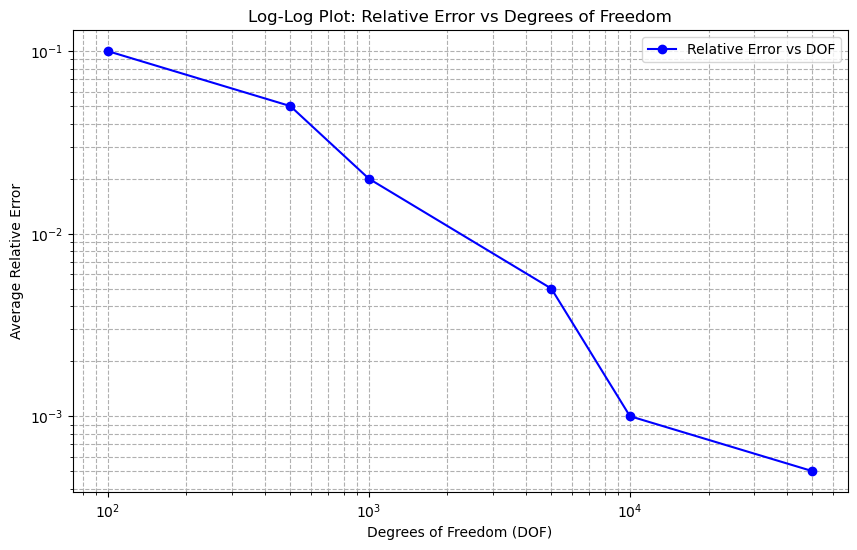

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Example DOF and relative error data
dof_list = [100, 500, 1000, 5000, 10000, 50000]
avg_relative_errors = [0.1, 0.05, 0.02, 0.005, 0.001, 0.0005]

# Create the plot
plt.figure(figsize=(10, 6))

# Use log-log scale (both axes logarithmic)
plt.loglog(dof_list, avg_relative_errors, marker='o', linestyle='-', color='b', label="Relative Error vs DOF")

# Label the axes
plt.xlabel('Degrees of Freedom (DOF)')
plt.ylabel('Average Relative Error')
plt.title('Log-Log Plot: Relative Error vs Degrees of Freedom')

# Add grid and legend
plt.grid(True, which="both", ls="--")
plt.legend()